In [23]:
# DON'T CHANGE THIS
# DON'T 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

y = np.random.randint(2, size=(100, 1))          # Generating random labels
y_preds = np.random.uniform(0, 1, size=(100, 1)) # Generating random predictions

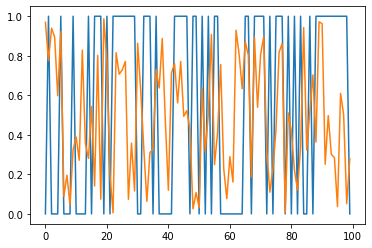

In [24]:
# DON'T CHANGE THIS
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(y_preds)



In [25]:

y = np.multiply(y, 1)
y_pre = np.where( y_preds > 0.5 , 1 , 0)

TP = ((y == 1) & (y_pre == 1)).sum()
TN = ((y == 0) & (y_pre == 0)).sum()
FP = ((y == 1) & (y_pre == 0)).sum()
FN = ((y == 0) & (y_pre == 1)).sum()   

In [30]:
Accuracy = (TP+TN) / (TP + TN +FP+FN) 
conf_Matrix = np.array([[TP , FP] , [FN , TN]])
precision = TP / (TP+FP)
recall = TP /( TP+FN)
f1_score = 2*((precision * recall)/(precision + recall))
print("Accuracy = {} \nprecision = {} \nrecall = {} \nf1_score = {} \n "
      .format(Accuracy , precision , recall , f1_score))
print("Confusion Matrix \n{}".format(conf_Matrix))

Accuracy = 0.54 
precision = 0.5178571428571429 
recall = 0.6041666666666666 
f1_score = 0.5576923076923077 
 
Confusion Matrix 
[[29 27]
 [19 25]]


In [31]:
from scipy.integrate import simps

<ipython-input-33-306f96397429>:13: RuntimeWarning: invalid value encountered in long_scalars
  TPR_list.append(FP /(TN + FP))
<ipython-input-33-306f96397429>:12: RuntimeWarning: invalid value encountered in long_scalars
  FPR_list.append(TP /(TP +FN ))


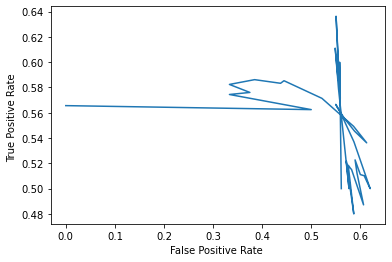

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


In [33]:
#AUC Curve
FPR_list = []
TPR_list = []
AUC_area = []
therathold = np.linspace(0,1,50)
for i in therathold:
    y_pre = np.where( y_preds > i , 1 , 0)
    TP = ((y == 1) & (y_pre == 1)).sum()
    TN = ((y == 0) & (y_pre == 0)).sum() 
    FP = ((y == 1) & (y_pre == 0)).sum() 
    FN = ((y == 0) & (y_pre == 1)).sum()
    FPR_list.append(TP /(TP +FN ))
    TPR_list.append(FP /(TN + FP))

    
AUC_area.append(simps(y, dx=i))

plt.plot(FPR_list ,TPR_list)
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate ")
plt.show()
print(AUC_area)